## Imports

In [168]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv("../../first_exo/concrete_strength_dataset.csv")

## First Iteration

In [35]:
# split into input (X) and output (y) variables
X = df.drop(['Strength'],axis=1)
y = df["Strength"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
def Model(loss :str = 'mean_squared_error', optimizer :str = 'adam', metric :str = 'mse'):
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # compile the keras model
    model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
    return model

In [8]:
def coeff_determination(y_true, y_pred):

    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [42]:
...
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=5, batch_size=32,shuffle=True)
...
# ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')

Epoch 1/5
22/22 [==============================] - 0s 7ms/step - loss: 1352.4233 - mae: 32.9462 - val_loss: 1191.7800 - val_mae: 30.4084
Epoch 2/5
22/22 [==============================] - 0s 5ms/step - loss: 1227.4520 - mae: 31.0534 - val_loss: 1045.4895 - val_mae: 28.0230
Epoch 3/5
22/22 [==============================] - 0s 4ms/step - loss: 1061.9102 - mae: 28.4442 - val_loss: 869.3087 - val_mae: 25.0376
Epoch 4/5
22/22 [==============================] - 0s 4ms/step - loss: 868.4135 - mae: 25.2004 - val_loss: 674.5463 - val_mae: 21.5402
Epoch 5/5
22/22 [==============================] - 0s 4ms/step - loss: 661.8477 - mae: 21.4768 - val_loss: 492.9733 - val_mae: 17.7743


Ellipsis

In [12]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [27]:
def plot_learning_curve(history,metric,loss,): 
    plt.figure(figsize=(20,10))
    # summarize history for accuracy
    plt.plot(history.history[f'{metric}'])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(20,10))
    plt.plot(history.history[f'{loss}'])
    plt.plot(history.history[f'val_{loss}'])
    plt.title(f'model {loss}')
    plt.ylabel(f'{loss}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return plt.show()


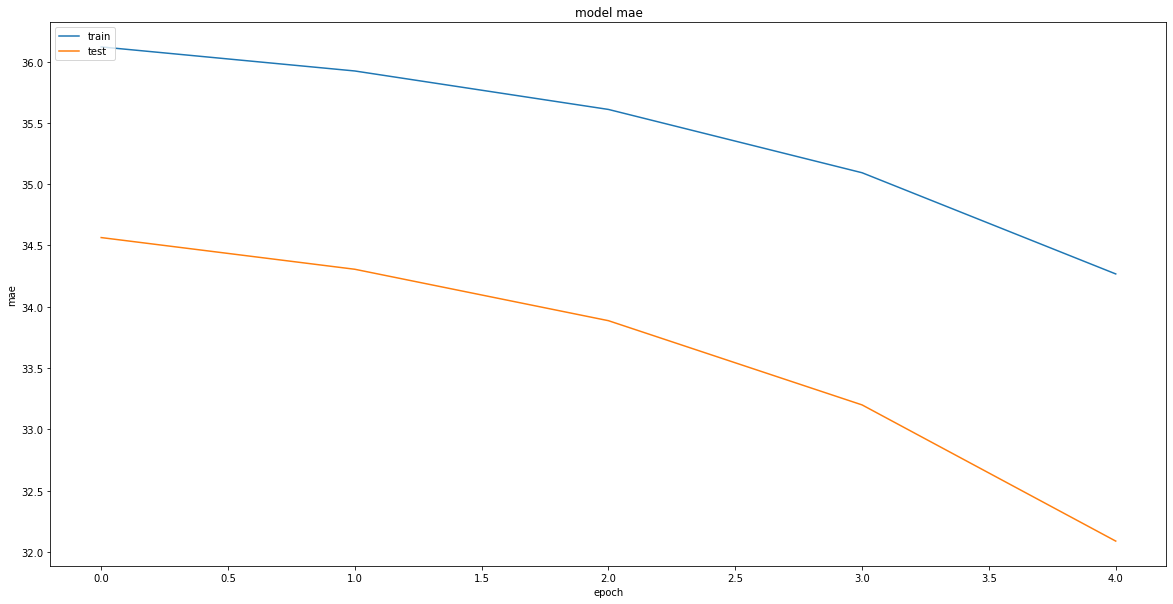

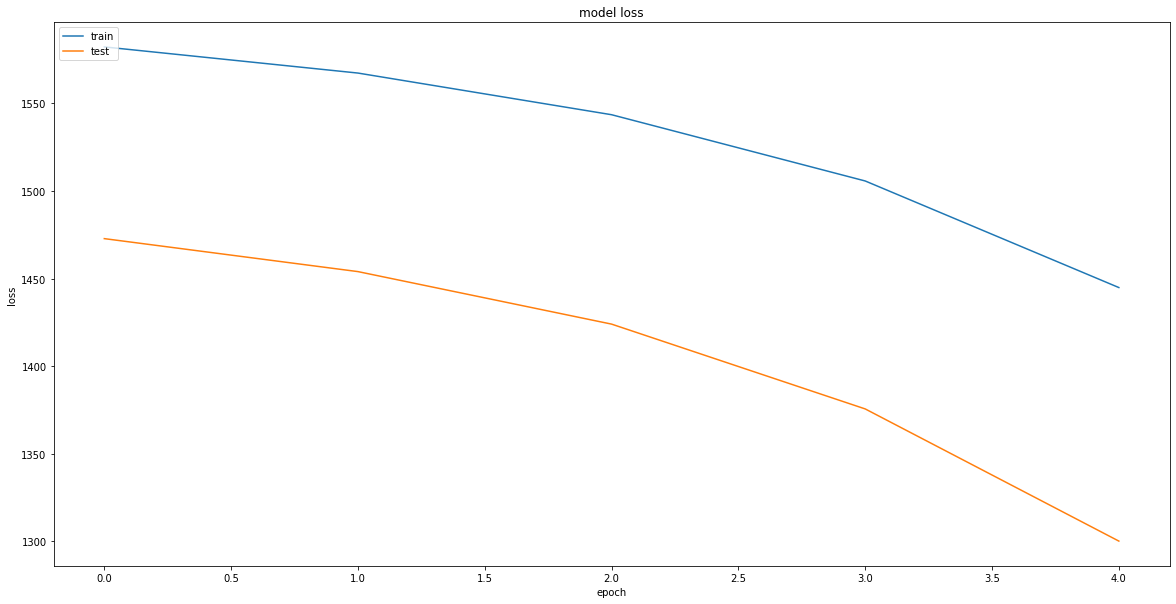

In [28]:
plot_learning_curve(history,'mae','loss')

In [20]:
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

-3.656717144884695


In [ ]:
# model.save('data/model.h5')

## Second Iteration

### Imports

In [22]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [29]:
def plot_learning_curve_kerras_pipeline(history,metric,loss): 
    plt.figure(figsize=(20,10))
    # summarize history for accuracy
    plt.plot(history.history_[f'{metric}'])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(20,10))
    plt.plot(history.history_[f'{loss}'])
    plt.plot(history.history_[f'val_{loss}'])
    plt.title(f'model {loss}')
    plt.ylabel(f'{loss}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return plt.show()


### First pipe

In [36]:
# pip install scikeras --user
clf = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='adam', metrics=['mae'], shuffle=True,
                           validation_split=0.3)

In [37]:
pipe = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf)
])


pipe.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 20ms/step - loss: 1617.3390 - mean_absolute_error: 36.3592 - val_loss: 1476.6830 - val_mean_absolute_error: 35.2616
Epoch 2/600
16/16 [==============================] - 0s 6ms/step - loss: 1601.0525 - mean_absolute_error: 36.1553 - val_loss: 1458.5840 - val_mean_absolute_error: 35.0185
Epoch 3/600
16/16 [==============================] - 0s 6ms/step - loss: 1578.7710 - mean_absolute_error: 35.8710 - val_loss: 1433.5354 - val_mean_absolute_error: 34.6791
Epoch 4/600
16/16 [==============================] - 0s 6ms/step - loss: 1547.4124 - mean_absolute_error: 35.4712 - val_loss: 1398.7325 - val_mean_absolute_error: 34.1989
Epoch 5/600
16/16 [==============================] - 0s 6ms/step - loss: 1505.6536 - mean_absolute_error: 34.9253 - val_loss: 1353.2882 - val_mean_absolute_error: 33.5602
Epoch 6/600
16/16 [==============================] - 0s 7ms/step - loss: 1449.5686 - mean_absolute_error: 34.1841 - val_loss: 1295.0066 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, optimizer='adam', validation_split=0.3))])

In [38]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

22/22 [==============================] - 0s 1ms/step
Training set score: 0.871783133618486
11/11 [==============================] - 0s 2ms/step
Test set score: 0.8498410692974373


In [39]:
hist = clf.history_.keys()
print(hist)

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


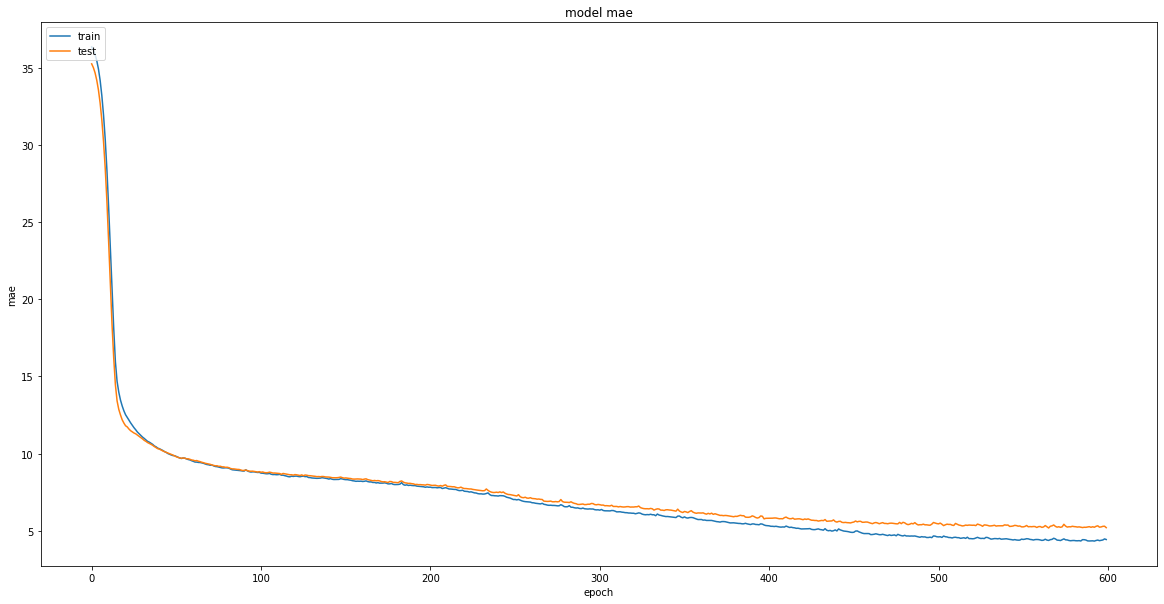

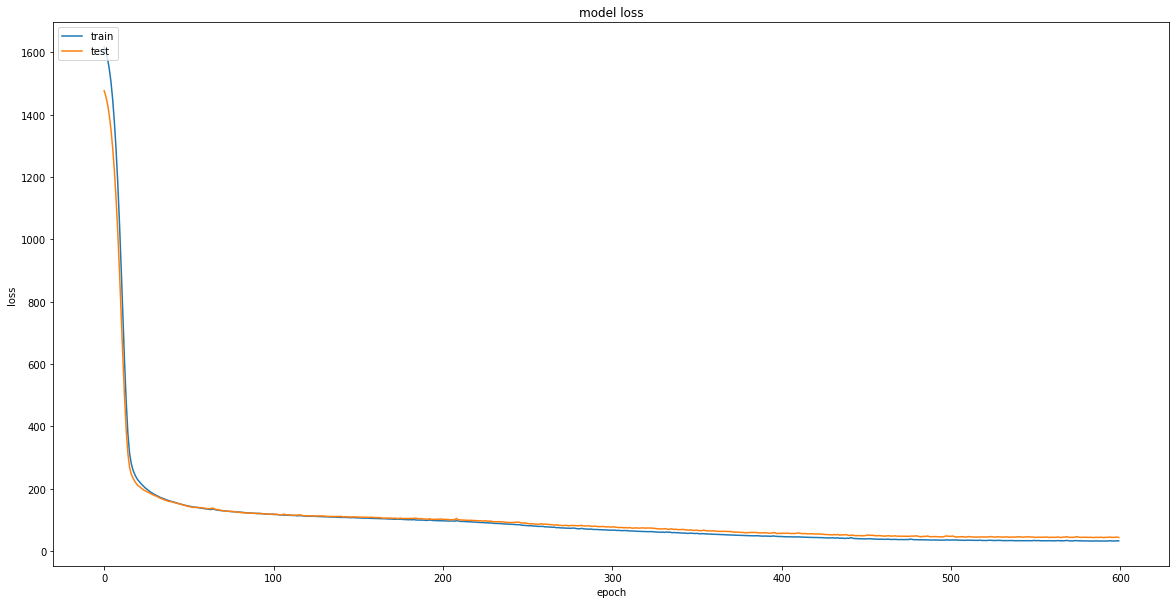

In [44]:
plot_learning_curve_kerras_pipeline(clf,'mae','loss') 

In [ ]:
# print(f"Trained {len(pipe.history_['loss'])} epochs")
# print(f"Final accuracy: {pipe.history_['val_binary_accuracy'][-1]}")  # get last value of last fit/partial_fit call

### Second pipe

In [45]:
clf_rms_prop = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop)
])


pipe_rms_prop.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 11ms/step - loss: 1596.7966 - mean_absolute_error: 36.0783 - val_loss: 1453.8254 - val_mean_absolute_error: 34.9473
Epoch 2/600
16/16 [==============================] - 0s 3ms/step - loss: 1573.7463 - mean_absolute_error: 35.7694 - val_loss: 1433.2821 - val_mean_absolute_error: 34.6668
Epoch 3/600
16/16 [==============================] - 0s 4ms/step - loss: 1548.6090 - mean_absolute_error: 35.4425 - val_loss: 1405.9585 - val_mean_absolute_error: 34.2935
Epoch 4/600
16/16 [==============================] - 0s 4ms/step - loss: 1517.6095 - mean_absolute_error: 35.0344 - val_loss: 1374.5443 - val_mean_absolute_error: 33.8597
Epoch 5/600
16/16 [==============================] - 0s 5ms/step - loss: 1482.4530 - mean_absolute_error: 34.5586 - val_loss: 1338.8167 - val_mean_absolute_error: 33.3554
Epoch 6/600
16/16 [==============================] - 0s 4ms/step - loss: 1443.0110 - mean_absolute_error: 34.0147 - val_loss: 1298.6953 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, validation_split=0.3))])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


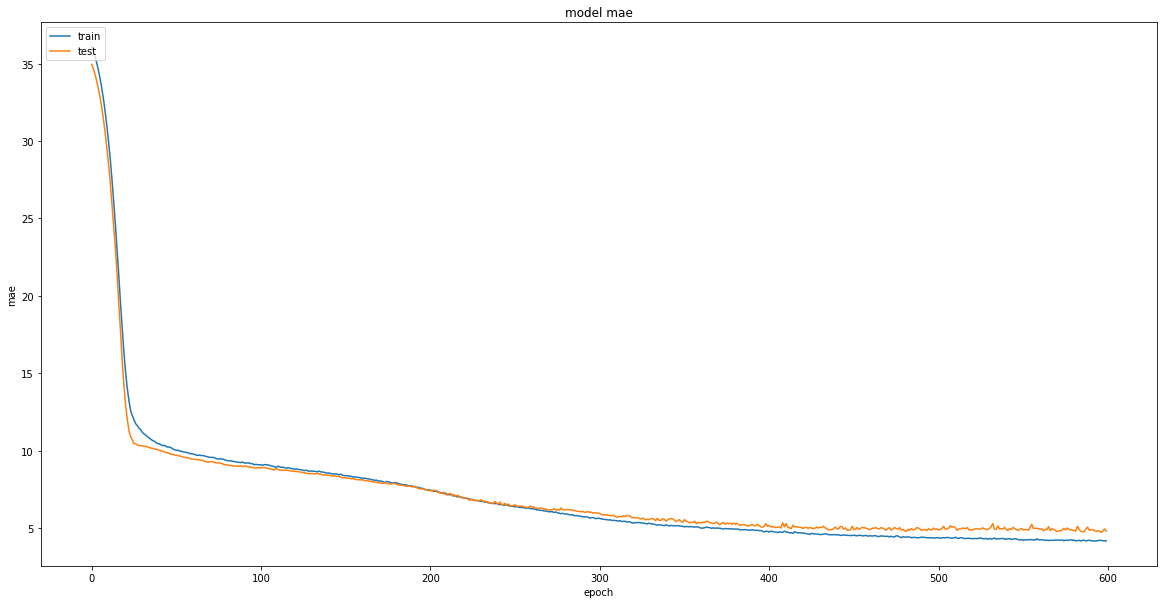

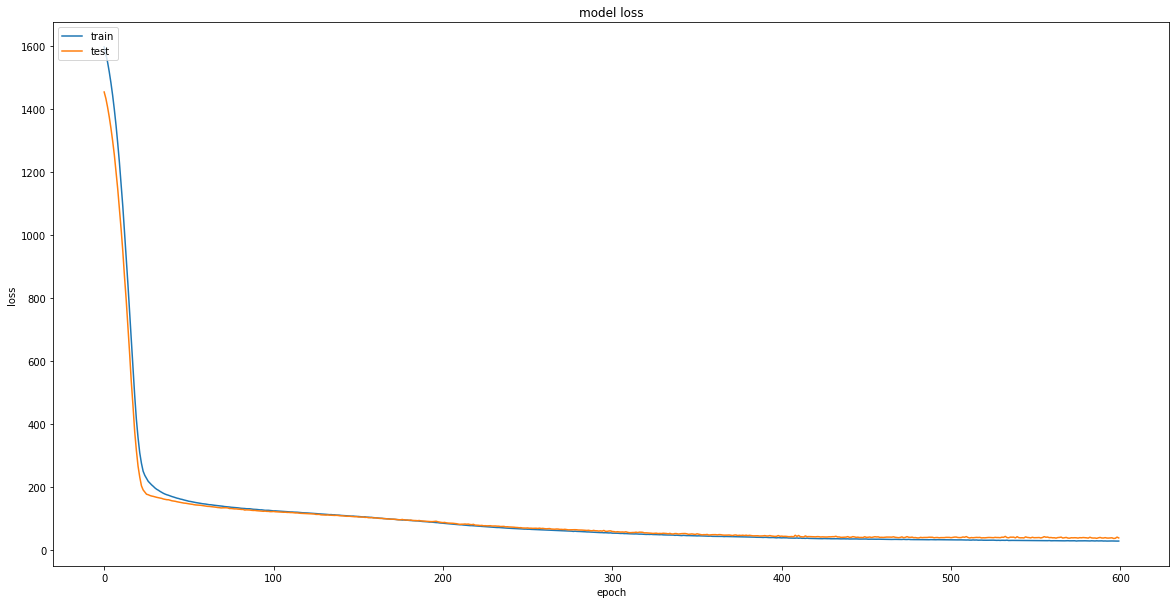

In [46]:
plot_learning_curve_kerras_pipeline(clf_rms_prop,'mae','loss')

In [47]:
print('Training set score: ' + str(pipe_rms_prop.score(X_train,y_train)))
print('Test set score: ' + str(pipe_rms_prop.score(X_test,y_test)))

22/22 [==============================] - 0s 765us/step
Training set score: 0.8826092042692382
11/11 [==============================] - 0s 1ms/step
Test set score: 0.8488311408285585


### Thirst pipe (with new model architecture)

In [49]:
def Model_with_new_acrhitecture():
    # define the keras model
    modo = Sequential()
    modo.add(Dense(64, input_dim=8, activation='relu'))
    modo.add(Dense(64, activation='relu'))
    modo.add(Dense(1))
    # compile the keras model
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return modo

In [50]:
# pip install scikeras --user
clf_rms_prop_new_model_architecture = KerasRegressor(model=Model_with_new_acrhitecture, batch_size=32,loss='mean_squared_error', epochs=600,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop_new_model_architecture = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop_new_model_architecture)
])


pipe_rms_prop_new_model_architecture.fit(X_train, y_train)

Epoch 1/600
16/16 [==============================] - 1s 15ms/step - loss: 1669.5630 - mean_absolute_error: 37.0386 - val_loss: 1521.0880 - val_mean_absolute_error: 35.8676
Epoch 2/600
16/16 [==============================] - 0s 5ms/step - loss: 1652.2050 - mean_absolute_error: 36.8058 - val_loss: 1510.1151 - val_mean_absolute_error: 35.7123
Epoch 3/600
16/16 [==============================] - 0s 4ms/step - loss: 1641.6053 - mean_absolute_error: 36.6615 - val_loss: 1502.6271 - val_mean_absolute_error: 35.6034
Epoch 4/600
16/16 [==============================] - 0s 4ms/step - loss: 1633.8086 - mean_absolute_error: 36.5558 - val_loss: 1496.3162 - val_mean_absolute_error: 35.5133
Epoch 5/600
16/16 [==============================] - 0s 5ms/step - loss: 1627.6431 - mean_absolute_error: 36.4697 - val_loss: 1490.9067 - val_mean_absolute_error: 35.4347
Epoch 6/600
16/16 [==============================] - 0s 5ms/step - loss: 1621.9958 - mean_absolute_error: 36.3881 - val_loss: 1485.7166 - val_me

Pipeline(steps=[('rescale', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, epochs=600, loss='mean_squared_error', metrics=['mae'], model=<function Model at 0x000002763DB83D30>, validation_split=0.3))])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


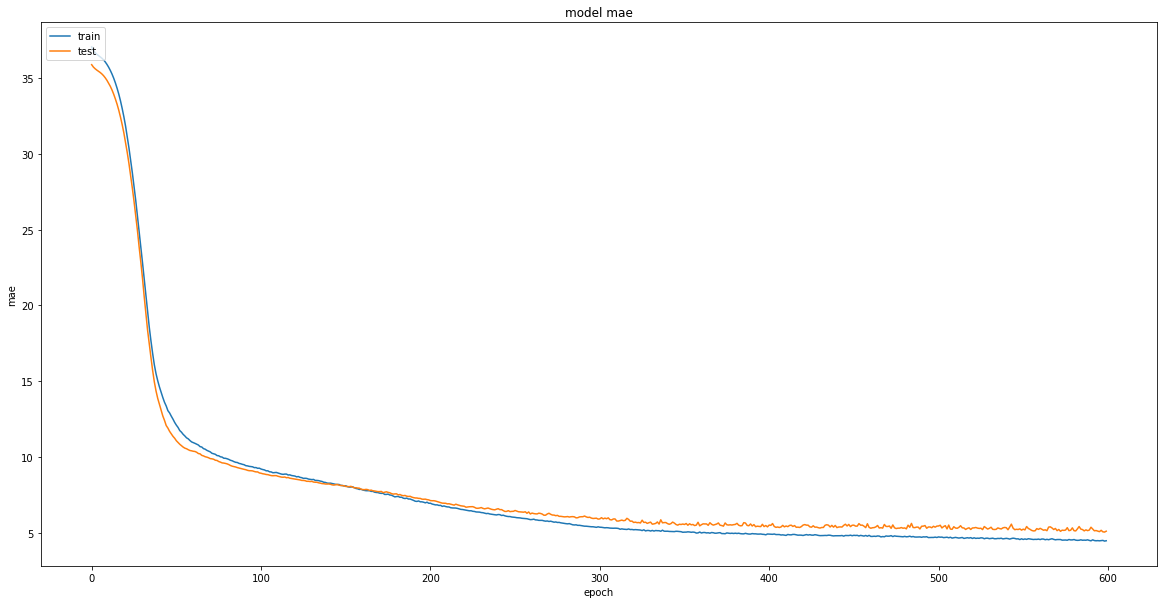

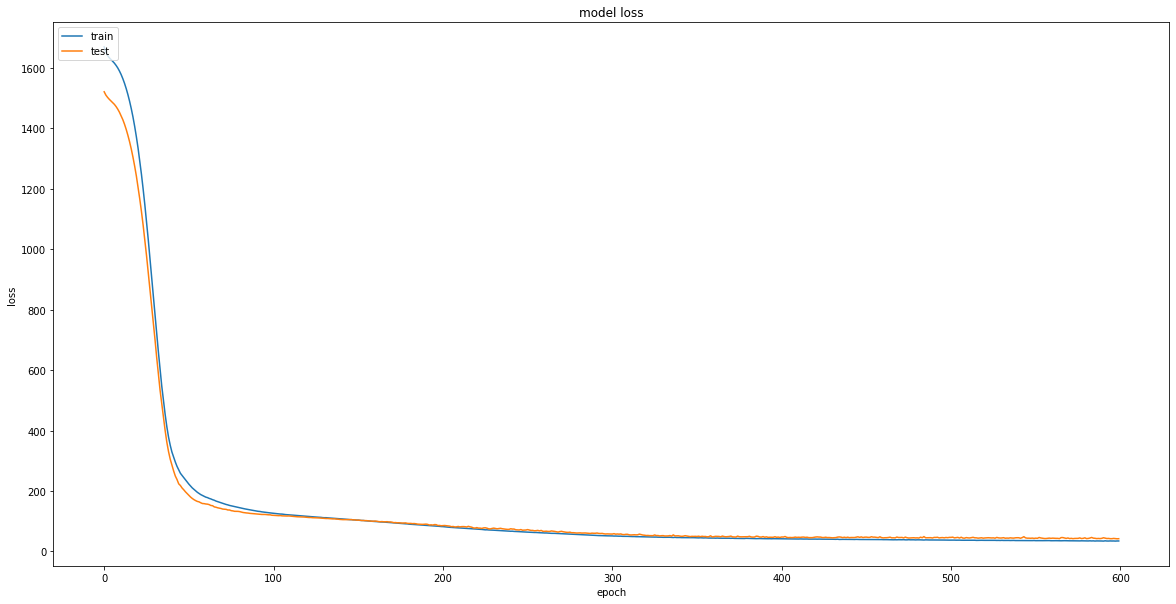

In [51]:
plot_learning_curve_kerras_pipeline(clf_rms_prop_new_model_architecture,'mae','loss')

### Fourth pipe(with only X and y data's)

In [91]:
# pip install scikeras --user
clf_rms_prop_new_model_architecture_X = KerasRegressor(model=Model, batch_size=32,loss='mean_squared_error', epochs=100,optimizer='rmsprop', metrics=['mae'], shuffle=True,
                           validation_split=0.3)
pipe_rms_prop_new_model_architecture_X = Pipeline([
    ('rescale', preprocessing.StandardScaler()),
    ('nn', clf_rms_prop_new_model_architecture_X)
])


pipe_rms_prop_new_model_architecture_X.fit(X, y)

TypeError: Model() got an unexpected keyword argument 'validation_data'

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


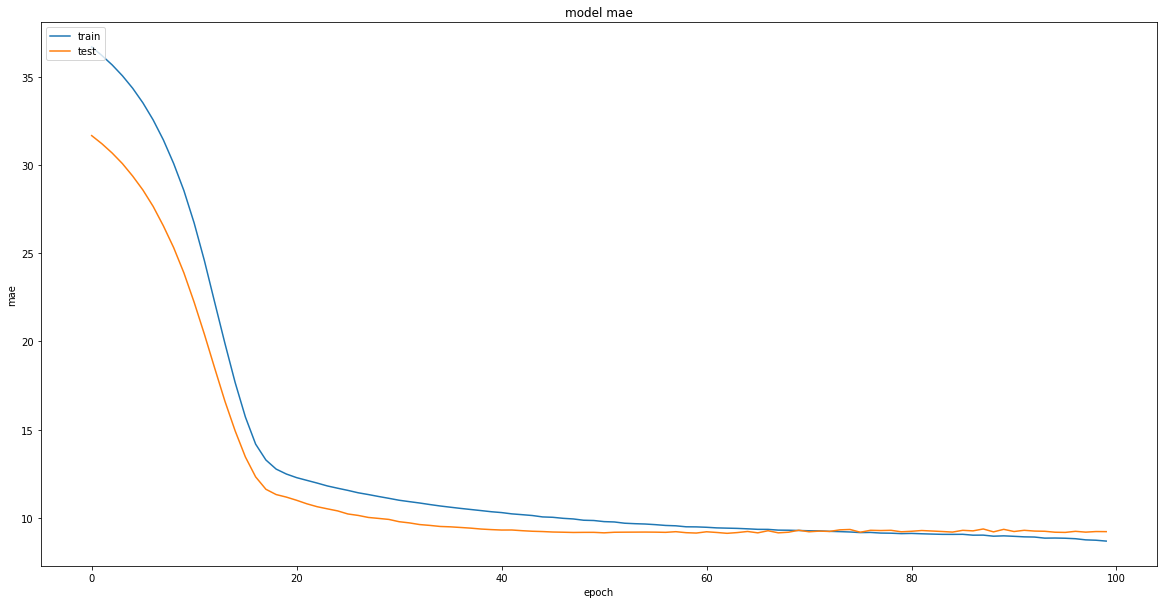

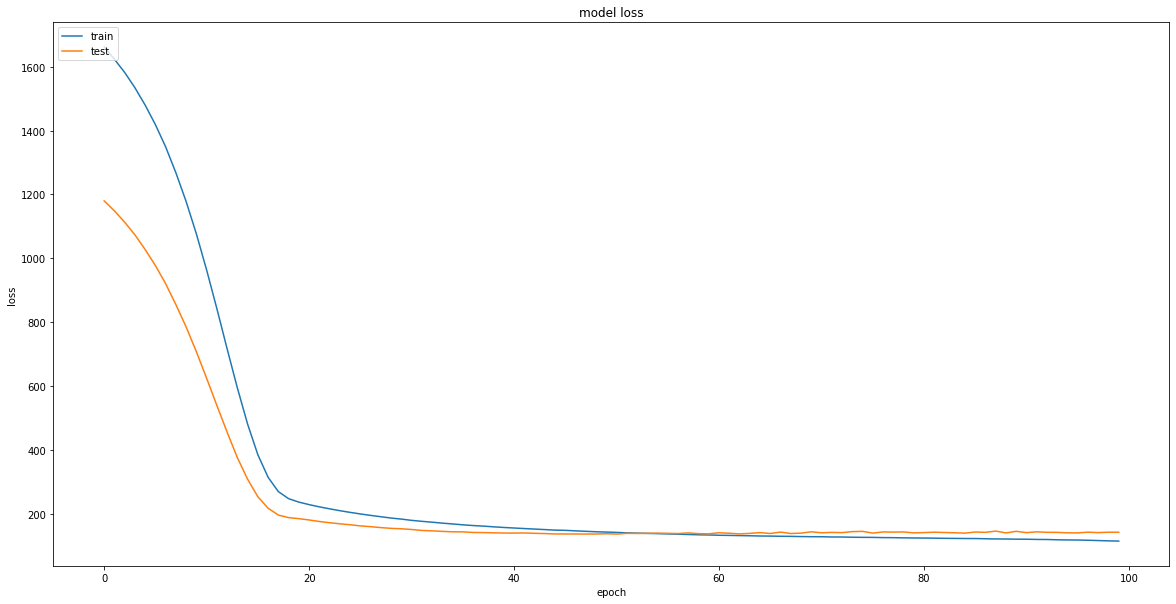

In [59]:
plot_learning_curve(clf_rms_prop_new_model_architecture_X,'mae','loss')

## K-fold cross validation

In [38]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print()

(1030, 8)
(1030,)
(690, 8)
(340, 8)



### First cross validation

In [98]:
def k_fold_cross_validation(k,num_epochs,train_data,train_targets,verbose = 1, model = Model()):
    k = k
    num_epochs = num_epochs
    num_val_samples = len(train_data) // k
    all_scores = k_fold_cross_validation.all_scores = []
    all_mae_histories = k_fold_cross_validation.all_mae_histories = []
    all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories = []

    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
        partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

        model = model
        model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
        
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
        epochs = num_epochs, batch_size=16, verbose=0)
        val_mae_history = k_fold_cross_validation.val_mae_history = history.history["val_mae"]
        mae_history = k_fold_cross_validation.mae_history = history.history['mae']
        all_val_mae_histories.append(val_mae_history)
        all_mae_histories.append(mae_history)
        

        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=verbose)
        all_scores.append(val_mae)


    return print(all_scores)

In [187]:
def k_fold_cross_validation_callback(k,num_epochs,train_data,train_targets,callbacks,verbose = 1, model = Model()):
    k = k
    num_epochs = num_epochs
    num_val_samples = len(train_data) // k
    all_scores = k_fold_cross_validation.all_scores = []
    all_mae_histories = k_fold_cross_validation.all_mae_histories = []
    all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories = []

    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
        partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

        model = model
        model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
        
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs = num_epochs, batch_size=16, verbose=2,callbacks = [callbacks])
        val_mae_history = k_fold_cross_validation.val_mae_history = history.history["val_mae"]
        mae_history = k_fold_cross_validation.mae_history = history.history['mae']
        all_val_mae_histories.append(val_mae_history)
        all_mae_histories.append(mae_history)
        

        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=verbose)
        all_scores.append(val_mae)


    return print(all_scores)

### First Iteration Cross validation

In [120]:
k_fold_cross_validation(4,500,X_train,y_train,verbose=2, model = Model(optimizer='rmsprop'),callbacks='none')

TypeError: k_fold_cross_validation() got an unexpected keyword argument 'callbacks'

In [100]:
k_fold_cross_validation(4,500,X_train,y_train,verbose=2, model = Model(optimizer='rmsprop'))

Processing fold #0
6/6 - 0s - loss: 51.0964 - mae: 5.3598 - 28ms/epoch - 5ms/step
Processing fold #1
6/6 - 0s - loss: 31.0024 - mae: 4.2321 - 28ms/epoch - 5ms/step
Processing fold #2
6/6 - 0s - loss: 32.9383 - mae: 4.4859 - 30ms/epoch - 5ms/step
Processing fold #3
6/6 - 0s - loss: 31.0069 - mae: 4.1748 - 34ms/epoch - 6ms/step
[5.359777927398682, 4.232104778289795, 4.485851287841797, 4.1747589111328125]


In [101]:
all_mae_histories = k_fold_cross_validation.all_mae_histories
all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories

In [104]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(500)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(500)]

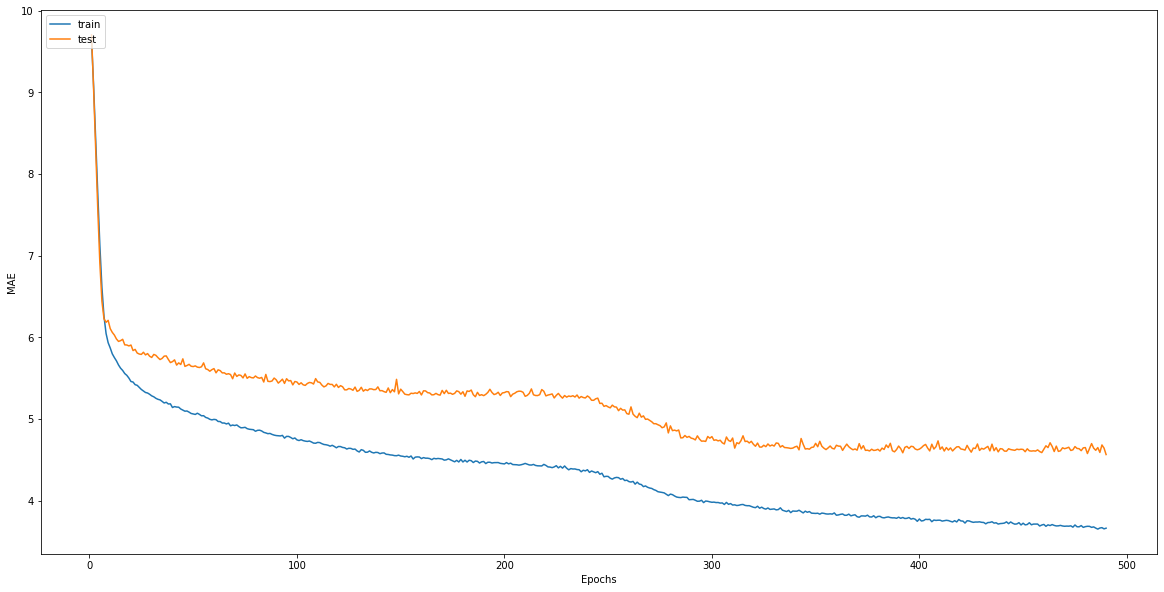

In [105]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The mean of our model started to over fit of about 1 point onf mae after 20 epochs, is not to big but we can do better let's increase the number of epochs and let's change the optimizer

### Second Iteration Cross validation

In [216]:
k_fold_cross_validation(4,1000,X_train,y_train,verbose = 2,model=Model(optimizer='rmsprop'))

Processing fold #0
6/6 - 0s - loss: 54.6594 - mae: 5.1033 - 30ms/epoch - 5ms/step
Processing fold #1
6/6 - 0s - loss: 26.4303 - mae: 4.0906 - 34ms/epoch - 6ms/step
Processing fold #2
6/6 - 0s - loss: 27.0180 - mae: 3.9725 - 30ms/epoch - 5ms/step
Processing fold #3
6/6 - 0s - loss: 22.1070 - mae: 3.6150 - 30ms/epoch - 5ms/step
[5.1033477783203125, 4.090621471405029, 3.972508192062378, 3.6150076389312744]


In [ ]:
all_mae_histories = k_fold_cross_validation.all_mae_histories
all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(200)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(200)]

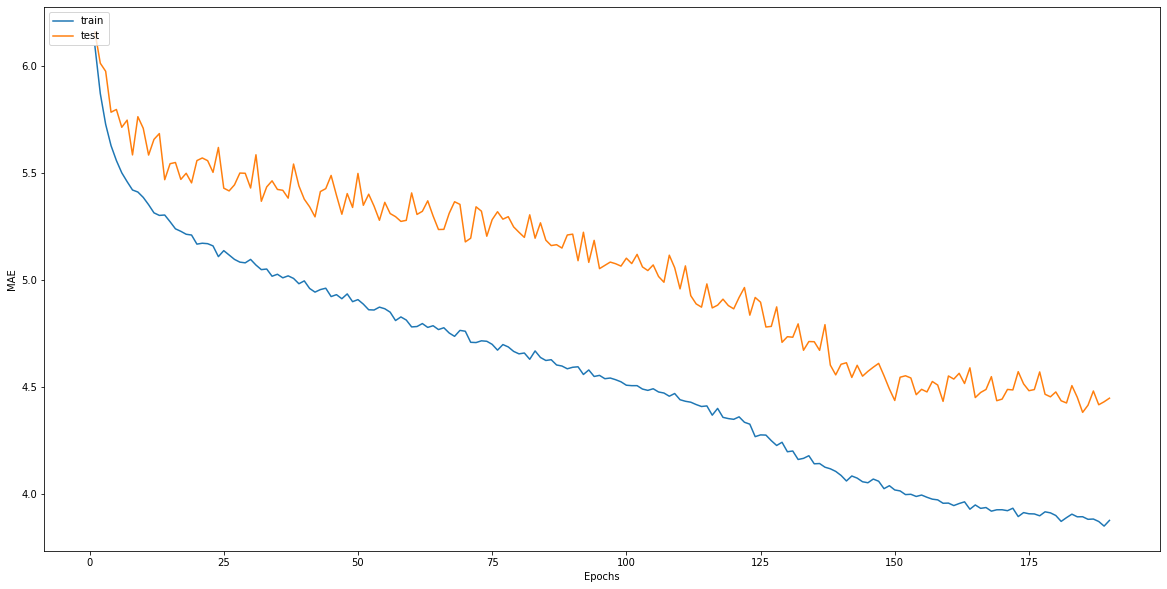

In [ ]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mae overfitting always seems to be one but on average we decrease this mae.

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(1000)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(1000)]

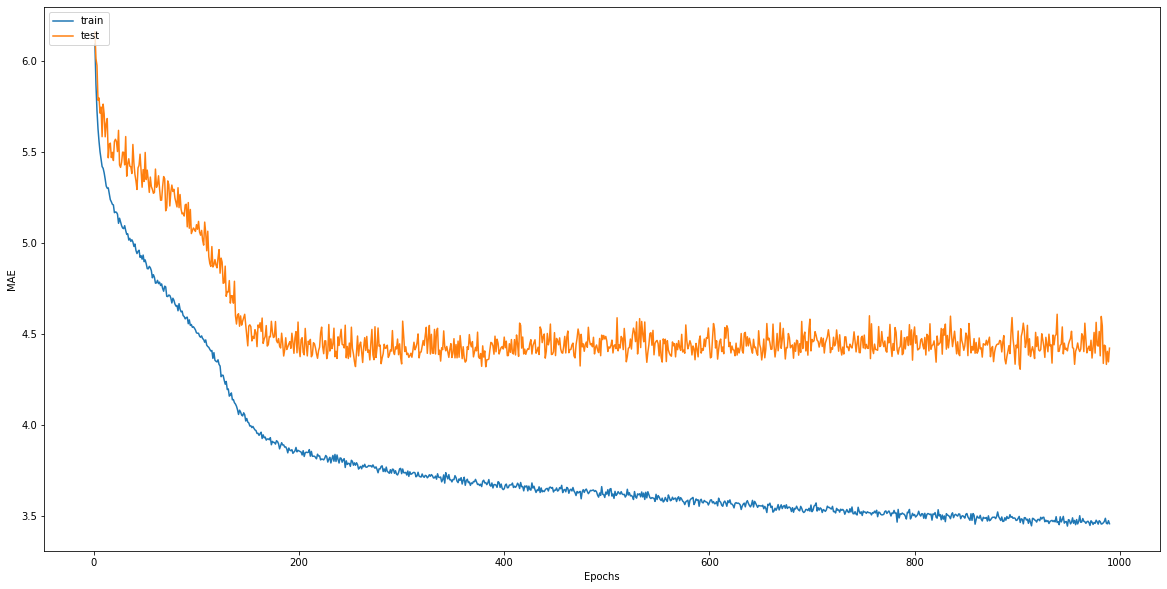

In [ ]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the minimum overfitting seems to be between 110 and 175 epochs let's do an early stopping to optimise this model

In [106]:
k_fold_cross_validation(4,1000,X_train,y_train,verbose = 2,model=Model(optimizer='adam'))

Processing fold #0
6/6 - 0s - loss: 50.2724 - mae: 5.0685 - 36ms/epoch - 6ms/step
Processing fold #1
6/6 - 0s - loss: 31.1075 - mae: 4.2750 - 34ms/epoch - 6ms/step
Processing fold #2
6/6 - 0s - loss: 33.6054 - mae: 4.5121 - 29ms/epoch - 5ms/step
Processing fold #3
6/6 - 0s - loss: 26.7127 - mae: 3.8369 - 71ms/epoch - 12ms/step
[5.068511009216309, 4.274957180023193, 4.512123107910156, 3.8369219303131104]


In [107]:
all_mae_histories = k_fold_cross_validation.all_mae_histories
all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories

In [112]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(200)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(200)]

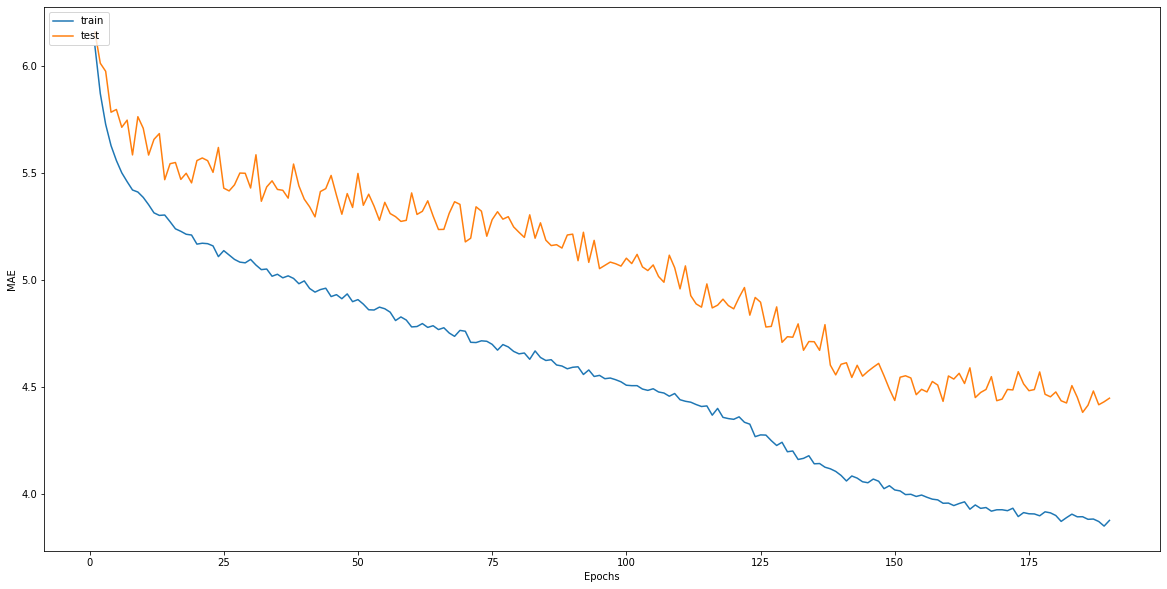

In [113]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mae overfitting always seems to be one but on average we decrease this mae.

In [117]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(1000)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(1000)]

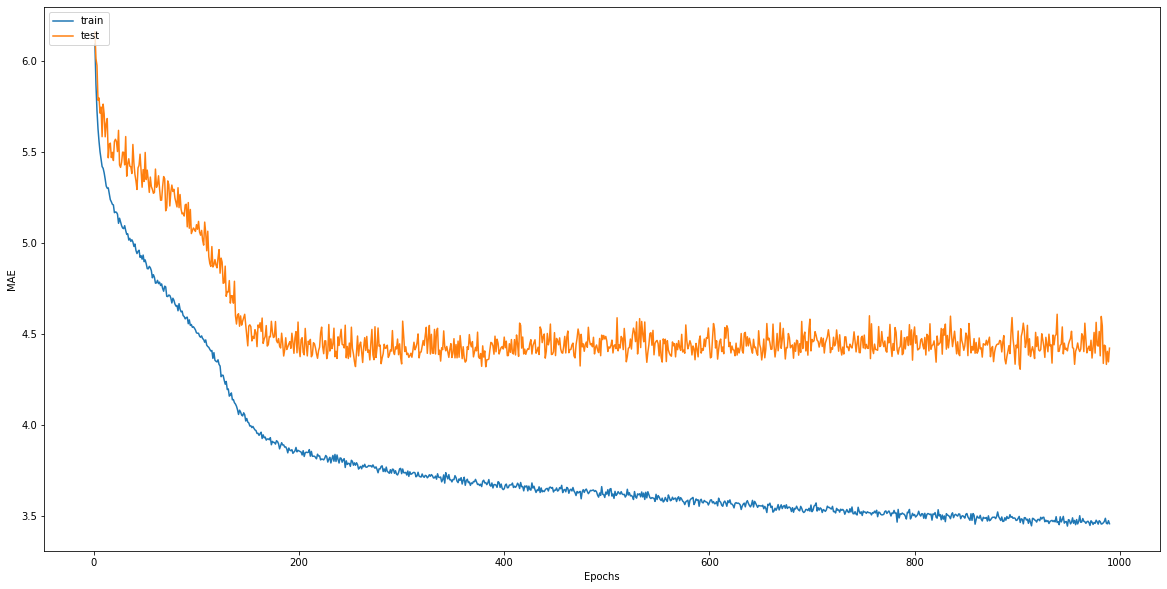

In [118]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the minimum overfitting seems to be between 110 and 175 epochs let's do an early stopping to optimise this model.

Trop d’époques peuvent conduire à un surajustement de l’ensemble de données d’apprentissage, alors que trop peu peuvent entraîner un modèle sous-ajusté. L’arrêt anticipé est une méthode qui vous permet de spécifier un nombre arbitraire élevé d’époques d’apprentissage et d’arrêter la formation une fois que les performances du modèle cessent de s’améliorer sur un jeu de données de validation de retenue.

### Third Iteration Cross validation

In [219]:
stp = EarlyStopping(
        monitor="val_mae",
        mode="min",
        min_delta = 0.5,
        verbose = 1,
        patience = 150)


#### 1st Iteration adam without early stop 1000 epochs (5min 5.4s)

In [ ]:
[5.068511009216309, 4.274957180023193, 4.512123107910156, 3.8369219303131104]

#### 2nd Iteration rmsprop without early stop 1000 epochs (4min 51.5s)

In [ ]:
[5.1033477783203125, 4.090621471405029, 3.972508192062378, 3.6150076389312744]

#### 3rd Iteration adam early stop (2m 25.7s)

In [ ]:
[9.218570709228516, 7.804465293884277, 5.22639274597168, 4.5027265548706055]
[9.000301361083984, 7.7968950271606445, 7.117245197296143, 7.929222583770752]  

In [215]:
k_fold_cross_validation_callback(4,500,X_train,y_train,verbose = 2,model=Model(optimizer='adam'),callbacks=stp)

Processing fold #0
Epoch 1/500
33/33 - 1s - loss: 1490.9319 - mae: 34.8952 - val_loss: 1634.8070 - val_mae: 36.3852 - 878ms/epoch - 27ms/step
Epoch 2/500
33/33 - 0s - loss: 1429.3009 - mae: 33.9462 - val_loss: 1549.0140 - val_mae: 35.1721 - 90ms/epoch - 3ms/step
Epoch 3/500
33/33 - 0s - loss: 1339.1282 - mae: 32.5017 - val_loss: 1424.5605 - val_mae: 33.3578 - 83ms/epoch - 3ms/step
Epoch 4/500
33/33 - 0s - loss: 1212.6240 - mae: 30.4610 - val_loss: 1263.8928 - val_mae: 30.8868 - 74ms/epoch - 2ms/step
Epoch 5/500
33/33 - 0s - loss: 1053.1863 - mae: 27.8447 - val_loss: 1064.0211 - val_mae: 27.7070 - 113ms/epoch - 3ms/step
Epoch 6/500
33/33 - 0s - loss: 865.6916 - mae: 24.6075 - val_loss: 850.0131 - val_mae: 24.1963 - 108ms/epoch - 3ms/step
Epoch 7/500
33/33 - 0s - loss: 674.8920 - mae: 21.3380 - val_loss: 637.8282 - val_mae: 20.6875 - 80ms/epoch - 2ms/step
Epoch 8/500
33/33 - 0s - loss: 497.3289 - mae: 18.1276 - val_loss: 460.4825 - val_mae: 17.5448 - 61ms/epoch - 2ms/step
Epoch 9/500
33/

In [208]:
all_mae_histories = k_fold_cross_validation.all_mae_histories
all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories

In [212]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(151)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(151)]

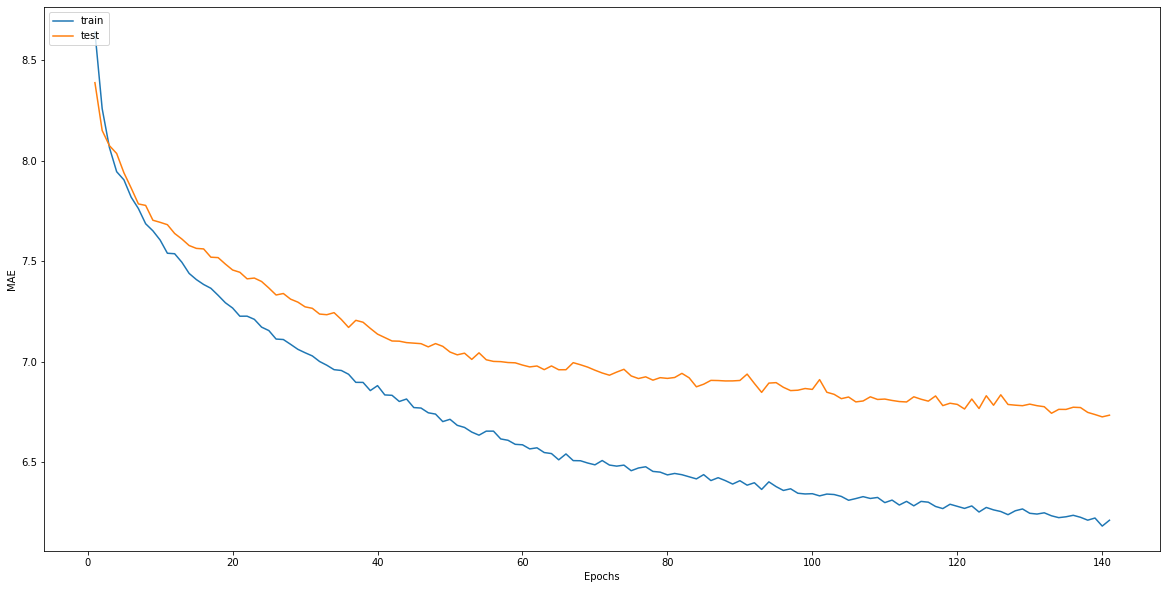

In [213]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[9.218570709228516, 7.804465293884277, 5.22639274597168, 4.5027265548706055]  
  
stp = EarlyStopping(monitor="val_mae", mode="min", min_delta = 0.5, verbose = 1, patience = 150)

Using Adam optimizer with same values of early stopping results are worst than rmsprop, for better values we have to increase patience min delta

[9.000301361083984, 7.7968950271606445, 7.117245197296143, 7.929222583770752]  
  
stp = EarlyStopping(monitor="val_mae", mode="min", min_delta = 0.5, verbose = 1, patience = 400)

Compared to rmsprop adam takes longer to convergeand **we had no luck in initializing the values ​​of our gradient descent**, *with more epochs* we should reach values similar than rmsprop but with even more epochs !

#### 4th Iteration rmsprop early stop on average 257 epochs (1min 4.3s)

In [ ]:
[5.126802444458008, 4.364965915679932, 4.663137912750244, 4.001428604125977]

In [220]:
k_fold_cross_validation_callback(4,500,X_train,y_train,verbose = 2,model=Model(optimizer='rmsprop'),callbacks=stp)

Processing fold #0
Epoch 1/500
33/33 - 1s - loss: 1551.8265 - mae: 35.8485 - val_loss: 1732.0529 - val_mae: 37.7871 - 1s/epoch - 31ms/step
Epoch 2/500
33/33 - 0s - loss: 1535.8236 - mae: 35.6264 - val_loss: 1711.0488 - val_mae: 37.5306 - 121ms/epoch - 4ms/step
Epoch 3/500
33/33 - 0s - loss: 1514.2400 - mae: 35.3428 - val_loss: 1676.7883 - val_mae: 37.1153 - 110ms/epoch - 3ms/step
Epoch 4/500
33/33 - 0s - loss: 1481.6305 - mae: 34.9129 - val_loss: 1630.6415 - val_mae: 36.5426 - 96ms/epoch - 3ms/step
Epoch 5/500
33/33 - 0s - loss: 1439.5355 - mae: 34.3460 - val_loss: 1575.4618 - val_mae: 35.8390 - 90ms/epoch - 3ms/step
Epoch 6/500
33/33 - 0s - loss: 1384.9214 - mae: 33.5803 - val_loss: 1502.0123 - val_mae: 34.8749 - 91ms/epoch - 3ms/step
Epoch 7/500
33/33 - 0s - loss: 1314.4406 - mae: 32.5464 - val_loss: 1410.3232 - val_mae: 33.6174 - 97ms/epoch - 3ms/step
Epoch 8/500
33/33 - 0s - loss: 1224.8785 - mae: 31.2313 - val_loss: 1295.3358 - val_mae: 31.9896 - 89ms/epoch - 3ms/step
Epoch 9/500


In [221]:
all_mae_histories = k_fold_cross_validation.all_mae_histories
all_val_mae_histories = k_fold_cross_validation.all_val_mae_histories

In [223]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(151)]
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(151)]

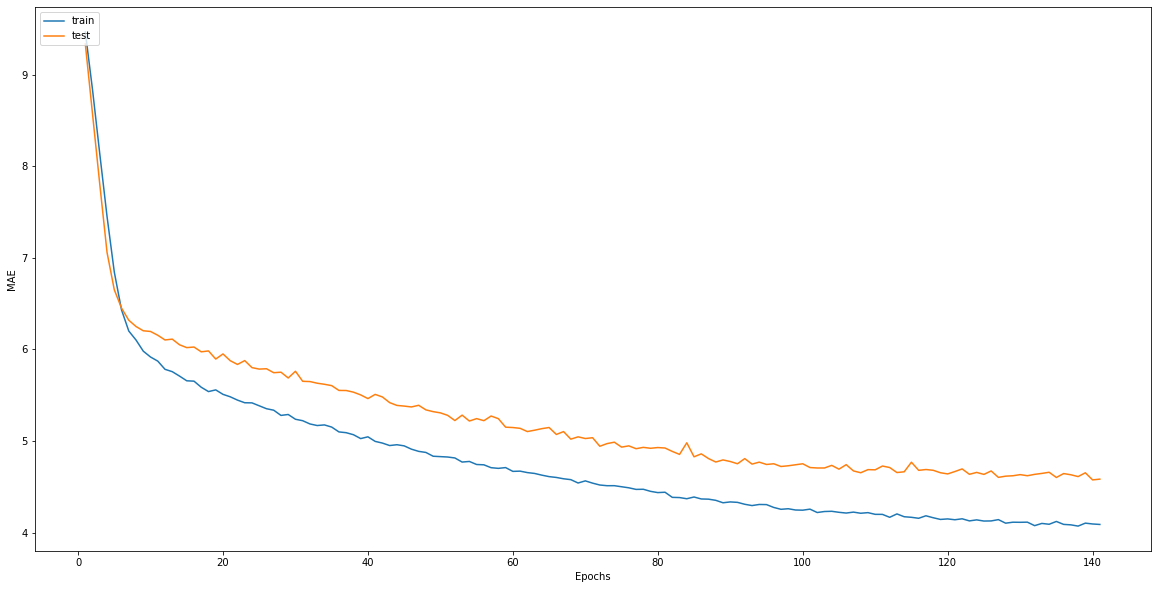

In [224]:
truncated_val_mae_history = average_val_mae_history[10:]
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(20,10))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.plot(range(1, len(truncated_val_mae_history) + 1), truncated_val_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

stp = EarlyStopping(monitor="val_mae", mode="min", min_delta = 0.5, verbose = 1, patience = 150)

[5.126802444458008, 4.364965915679932, 4.663137912750244, 4.001428604125977]